# Molecular Dynamics 

## Harmonic Oscillator Simulation

The simplest possible 1D harmonic oscillator simulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Poznámky k lekci

- Proč vidíme na elipse vzory?
- Evalueace celkové energie a interakcí zabere nejvíce výpočetního času.
- Přesnost simulace můžeme zvěšit zkrácením času.

In [2]:
ns = 50              # The number of steps.
dt = 0.2             # The time step in seconds.

t = 0.0              # The initial conditions: time.
x = 0.0              # The initial conditions: position.
v = 1.0              # The initial conditions: velocity.

m = 1.0              # The mass in kilograms.
k = 1.0              # The harmonic potential spring constant.

dU_dx = k * x        # The initial potential field
Ep = 0.5 * k * x**2  # The initial potential energy
a = - dU_dx / m      # The initial acceleration

# The data collection and output at t = 0
trj_t = [t]
trj_x = [x]
trj_v = [v]
trj_Ep = [Ep]

for i in range(ns):
    v += a * dt / 2      # Update the velocity.
    x += v * dt          # Update the position.
    Ep = 0.5 * k * x**2  # Update the potential energy
    dU_dx = k * x        # potencial 
    a = - dU_dx / m      # acceleration
    v += a * dt / 2      # velocity
    
    # Step done so update the time.
    t += dt

    # Store the calculated data.
    trj_t.append(t)
    trj_x.append(x)
    trj_v.append(v)
    trj_Ep.append(Ep)

## Process and plot

In [3]:
plt.style.use('seaborn')
plt.style.use({'figure.dpi': 150, 'legend.frameon': True})

### Trajectory

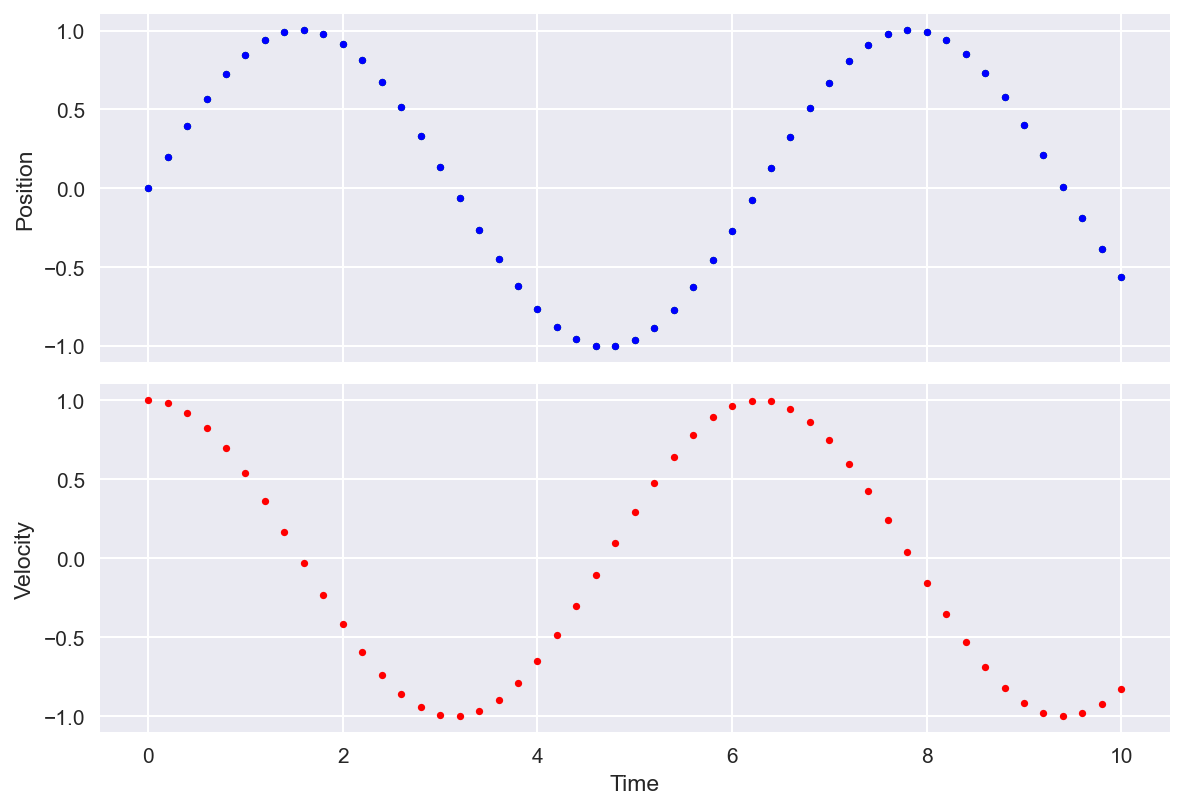

In [4]:
def plot_velocity_time_vs_velocity_position():
    plt.subplot(2, 1, 1)
    plt.plot(trj_t, trj_x, 'g.', trj_t, trj_x, "b.")
    plt.ylabel('Position')
    plt.tick_params(labelbottom=False)

    plt.subplot(2, 1, 2)
    plt.plot(trj_t, trj_v, 'r.')
    plt.ylabel('Velocity')
    plt.xlabel('Time')

    plt.tight_layout()

plot_velocity_time_vs_velocity_position()

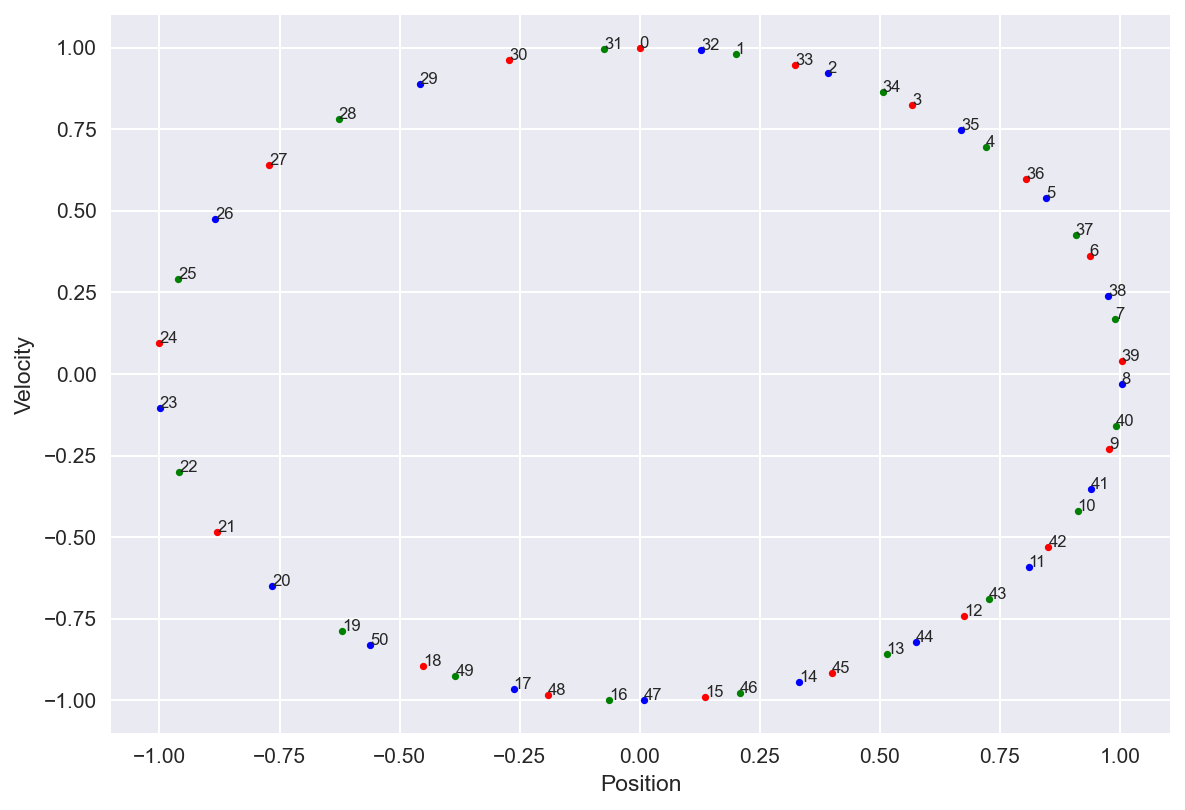

In [5]:
from itertools import zip_longest, cycle

colors = ['r','g','b']

for i, v in enumerate(zip(trj_x, trj_v, cycle(colors))):
    plt.plot(v[0], v[1], f"{v[2]}.")
    plt.annotate(i, size=8, xy=(v[0], v[1]))
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.tight_layout()

### Energies

In [62]:
# calculate kinetic energy along trajectory
trj_E_k = 0.5 * m * np.array(trj_v)**2

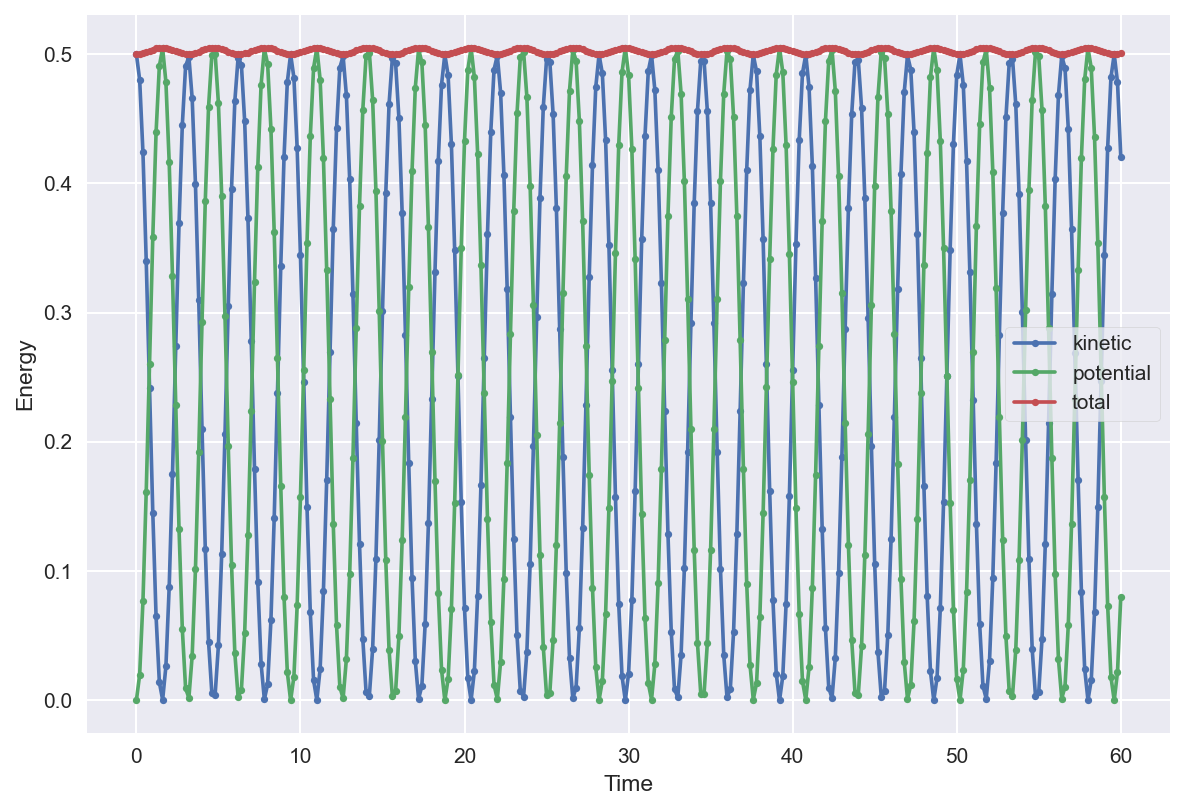

In [63]:
plt.plot(trj_t, trj_E_k, '.-', label='kinetic')
plt.plot(trj_t, trj_Ep, '.-', label='potential')
plt.plot(trj_t, trj_E_k + trj_Ep, '.-', label='total')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Energy')

plt.tight_layout()